## Load and save data

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import os
import csv
import pandas as pd
import datetime as dt

In [3]:
# Macros
BY_ZONE = False # True if you want grouping by zones (Nord, Centro, Sud, Sardegna)
BY_REGION = True # True if you want to keep single regions

In [4]:
# File name
#file_path = "../Data/dpc-covid19-ita-regioni.csv"
file_path = '/content/drive/Othercomputers/Laptop/homework3/Data/dpc-covid19-ita-regioni.csv'

# Load data
df_all = pd.read_csv(
    file_path,
    usecols = ["data", "denominazione_regione", "nuovi_positivi", "totale_ospedalizzati", "dimessi_guariti", "deceduti"],
    parse_dates = True,
)

# Convert data coulumn
df_all["data"] = pd.to_datetime(df_all["data"]).dt.date

# Keep only latest data wrt cut_date
cut_date = dt.date(2020, 1, 10)
df_all = df_all.loc[df_all["data"] >= cut_date]

In [ ]:
# Create 4 groups of regions
# NON SONO SICURO PERO': LUI CHIEDE ESPRESSAMENTE REGIONI!
if BY_ZONE:
    
    Nord = ["Emilia-Romagna", 
            "Friuli Venezia Giulia", 
            "Lombardia", 
            "P.A. Bolzano", 
            "P.A. Trento", 
            "Piemonte", 
            "Toscana", 
            "Valle d'Aosta",
            "Veneto"
           ]
    Centro = ["Abruzzo",
              "Lazio",
              "Marche",
              "Molise",
              "Umbria",
             ]

    Sud = ["Basilicata",
           "Calabria",
           "Campania",
           "Puglia",
           "Sicilia"
          ]

    Sardegna = ["Sardegna"]

    df_Nord = df_all.loc[df_all['denominazione_regione'].isin(Nord)]
    df_Nord.pop("denominazione_regione")
    df_Nord = df_Nord.groupby(["data"]).sum()
    df_Nord.reset_index(drop=False, inplace=True)

    df_Centro = df_all.loc[df_all['denominazione_regione'].isin(Centro)]
    df_Centro.pop("denominazione_regione")
    df_Centro = df_Centro.groupby(["data"]).sum()
    df_Centro.reset_index(drop=False, inplace=True)

    
    df_Sud = df_all.loc[df_all['denominazione_regione'].isin(Sud)]
    df_Sud.pop("denominazione_regione")
    df_Sud = df_Sud.groupby(["data"]).sum()
    df_Sud.reset_index(drop=False, inplace=True)

    
    df_Sardegna = df_all.loc[df_all['denominazione_regione'].isin(Sardegna)]
    df_Sardegna.pop("denominazione_regione")
    df_Sardegna = df_Sardegna.groupby(["data"]).sum()
    df_Sardegna.reset_index(drop=False, inplace=True)

In [5]:
if BY_REGION:
    
    df_by_region = dict() # dictionary containing data for each regione

    regions = list(df_all.loc[:,"denominazione_regione"].unique())
    
    for reg in regions:
        
        df_by_region[reg] = df_all.loc[df_all["denominazione_regione"] == reg]
        df_by_region[reg].pop("denominazione_regione")
        df_by_region[reg].reset_index(drop=True, inplace=True)

In [6]:
#Save the dictionary

if BY_REGION:
  
  #path = '../Data/'
  path = '/content/drive/Othercomputers/Laptop/homework3/Data/'

  for reg in regions:

    df_by_region[reg].to_csv(path + str(reg) + '.csv', 
                             index = False)
    

In [7]:
df_Nord

NameError: ignored

In [8]:
df_by_region["Lombardia"]

,data,totale_ospedalizzati,nuovi_positivi,dimessi_guariti,deceduti
0,2020-02-24,95,166,0,6
1,2020-02-25,104,68,0,9
2,2020-02-26,104,18,0,9
3,2020-02-27,213,145,40,14
4,2020-02-28,282,128,40,17
...,...,...,...,...,...
784,2022-04-18,1152,1614,2474365,39654
785,2022-04-19,1182,2329,2477871,39658
786,2022-04-20,1207,14065,2490531,39682
787,2022-04-21,1235,9678,2494869,39712


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc9e0a44090>,
      dtype=object)

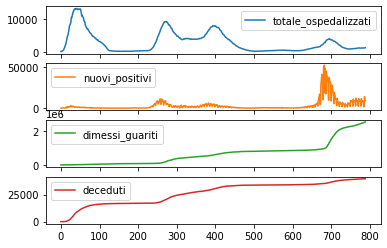

In [9]:
df_by_region['Lombardia'].plot(subplots=True)